# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1861]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [1863]:
# Importing the file porter_data_1.csv

porter = pd.read_csv("porter_data_1.csv")


In [1864]:
porter.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20


In [1865]:
porter.shape

(175777, 14)

In [1866]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [1867]:
porter.describe()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
count,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000
mean,2.743726,35.887949,2.911752,3.204976,2697.111147,2.675060,684.965433,1160.158616,44.918664,41.861381,58.230115,21.843090
std,1.330963,20.728254,1.513128,2.674055,1828.554893,1.625681,519.882924,560.828571,34.544724,32.168505,52.731043,8.748712
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000
25%,2.000000,18.000000,1.000000,2.000000,1412.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000,15.360000
50%,2.000000,38.000000,3.000000,3.000000,2224.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000,21.760000
75%,4.000000,55.000000,4.000000,4.000000,3410.000000,3.000000,942.000000,1395.000000,66.000000,63.000000,85.000000,28.120000
max,6.000000,72.000000,7.000000,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,83.520000


## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [1871]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

porter['created_at'] = pd.to_datetime(porter['created_at'], errors='coerce')
porter['actual_delivery_time'] = pd.to_datetime(porter['actual_delivery_time'], errors='coerce')


In [1872]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [1873]:
porter.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [1875]:
# Convert categorical features to category type

porter['market_id'] = porter['market_id'].astype('category')
porter['store_primary_category'] = porter['store_primary_category'].astype('category')
porter['order_protocol'] = porter['order_protocol'].astype('category')

In [1876]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [1877]:
porter.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [1880]:
# Calculate time taken in minutes
delivery_time = porter['actual_delivery_time'] - porter['created_at']
delivery_time_minutes = delivery_time.dt.total_seconds()/60
porter['delivery_time_minutes'] = delivery_time_minutes

In [1881]:
porter.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,delivery_time_minutes
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,47.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,44.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,55.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,59.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,46.0


In [1882]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [1884]:
# Extract the hour and day of week from the 'created_at' timestamp
porter['hour'] = porter['created_at'].dt.hour
porter['day_of_week'] = porter['created_at'].dt.dayofweek


# Create a categorical feature 'isWeekend'
porter['isWeekend'] = porter['day_of_week'].apply(lambda x: 1 if x>=5 else 0)
porter


,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,delivery_time_minutes,hour,day_of_week,isWeekend
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,47.0,22,4,0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,44.0,21,1,0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,55.0,0,0,0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,59.0,3,3,0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,46.0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175772,1.0,2015-02-17 00:19:41,2015-02-17 01:02:41,28,4.0,3,1389,3,345,649,17.0,17.0,23.0,13.24,43.0,0,1,0
175773,1.0,2015-02-13 00:01:59,2015-02-13 01:03:59,28,4.0,6,3010,4,405,825,12.0,11.0,14.0,36.60,62.0,0,4,0
175774,1.0,2015-01-24 04:46:08,2015-01-24 05:32:08,28,4.0,5,1836,3,300,399,39.0,41.0,40.0,31.80,46.0,4,5,1
175775,1.0,2015-02-01 18:18:15,2015-02-01 19:03:15,58,1.0,1,1175,1,535,535,7.0,7.0,12.0,15.36,45.0,18,6,1


In [1885]:
# Drop unnecessary columns
# created_at and actual_delivery_time features have been used to find delivery time in minutes, so these features are also not necessary to predict the delivery time.
# Also, delivery time is not dependent on the store_primary_category, so this column can be dropped as well.
drop_columns = ['created_at', 'actual_delivery_time', 'store_primary_category']
porter = porter.drop(drop_columns, axis=1)



In [1886]:
porter.head()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,delivery_time_minutes,hour,day_of_week,isWeekend
0,1.0,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,47.0,22,4,0
1,2.0,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,44.0,21,1,0
2,2.0,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,55.0,0,0,0
3,1.0,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,59.0,3,3,0
4,1.0,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,46.0,2,1,0


In [1887]:
porter.columns

Index(['market_id', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'delivery_time_minutes', 'hour',
       'day_of_week', 'isWeekend'],
      dtype='object')

In [1888]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  category
 1   order_protocol            175777 non-null  category
 2   total_items               175777 non-null  int64   
 3   subtotal                  175777 non-null  int64   
 4   num_distinct_items        175777 non-null  int64   
 5   min_item_price            175777 non-null  int64   
 6   max_item_price            175777 non-null  int64   
 7   total_onshift_dashers     175777 non-null  float64 
 8   total_busy_dashers        175777 non-null  float64 
 9   total_outstanding_orders  175777 non-null  float64 
 10  distance                  175777 non-null  float64 
 11  delivery_time_minutes     175777 non-null  float64 
 12  hour                      175777 non-null  int32   
 13  day_of_week               175

In [1889]:
porter.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,delivery_time_minutes,hour,day_of_week,isWeekend
count,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000
mean,3.204976,2697.111147,2.675060,684.965433,1160.158616,44.918664,41.861381,58.230115,21.843090,46.203013,8.473441,3.222293,0.345614
std,2.674055,1828.554893,1.625681,519.882924,560.828571,34.544724,32.168505,52.731043,8.748712,9.327424,8.676809,2.043874,0.475569
min,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,32.000000,0.000000,0.000000,0.000000
25%,2.000000,1412.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000,15.360000,39.000000,2.000000,1.000000,0.000000
50%,3.000000,2224.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000,21.760000,45.000000,3.000000,3.000000,0.000000
75%,4.000000,3410.000000,3.000000,942.000000,1395.000000,66.000000,63.000000,85.000000,28.120000,52.000000,19.000000,5.000000,1.000000
max,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,83.520000,110.000000,23.000000,6.000000,1.000000


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [1892]:
# Define target variable (y) and features (X)
y = porter['delivery_time_minutes']
X = porter.drop(['delivery_time_minutes'], axis=1)


In [1893]:
X.head()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour,day_of_week,isWeekend
0,1.0,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,22,4,0
1,2.0,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,21,1,0
2,2.0,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,0,0,0
3,1.0,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,3,3,0
4,1.0,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,2,1,0


In [1894]:
y.head()

0    47.0
1    44.0
2    55.0
3    59.0
4    46.0
Name: delivery_time_minutes, dtype: float64

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [1896]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [1897]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((123043, 14), (52734, 14), (123043,), (52734,))

In [1898]:
X_train.head()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour,day_of_week,isWeekend
94746,4.0,5.0,2,1790,2,795,995,10.0,9.0,15.0,18.04,18,0,0
173338,4.0,5.0,1,845,1,795,795,134.0,76.0,136.0,24.28,2,5,1
37592,4.0,5.0,1,1900,1,1200,1200,21.0,21.0,28.0,28.24,23,6,1
42763,2.0,4.0,6,463,3,0,299,98.0,87.0,129.0,13.88,1,5,1
27506,2.0,1.0,3,3500,3,600,1200,7.0,13.0,17.0,8.00,5,5,1


In [1899]:
X_test.head()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour,day_of_week,isWeekend
139667,1.0,1.0,3,1295,2,150,995,59.0,59.0,61.0,20.56,3,4,0
80077,1.0,1.0,2,2950,1,1225,1225,18.0,17.0,16.0,12.84,1,5,1
41872,1.0,4.0,1,1395,1,1395,1395,28.0,27.0,45.0,16.80,3,3,0
165269,4.0,5.0,2,2967,2,1097,1249,124.0,127.0,200.0,19.00,3,5,1
151215,4.0,2.0,3,1250,2,375,400,39.0,30.0,33.0,26.72,22,5,1


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [1902]:
# Define numerical and categorical columns for easy EDA and data manipulation
#num_col = X_train.select_dtypes(include=['number'])
num_col = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']

cat_col = ['market_id', 'order_protocol', 'day_of_week', 'isWeekend']
#cat_col = X_train.select_dtypes(include=['object', 'category', 'bool'])


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

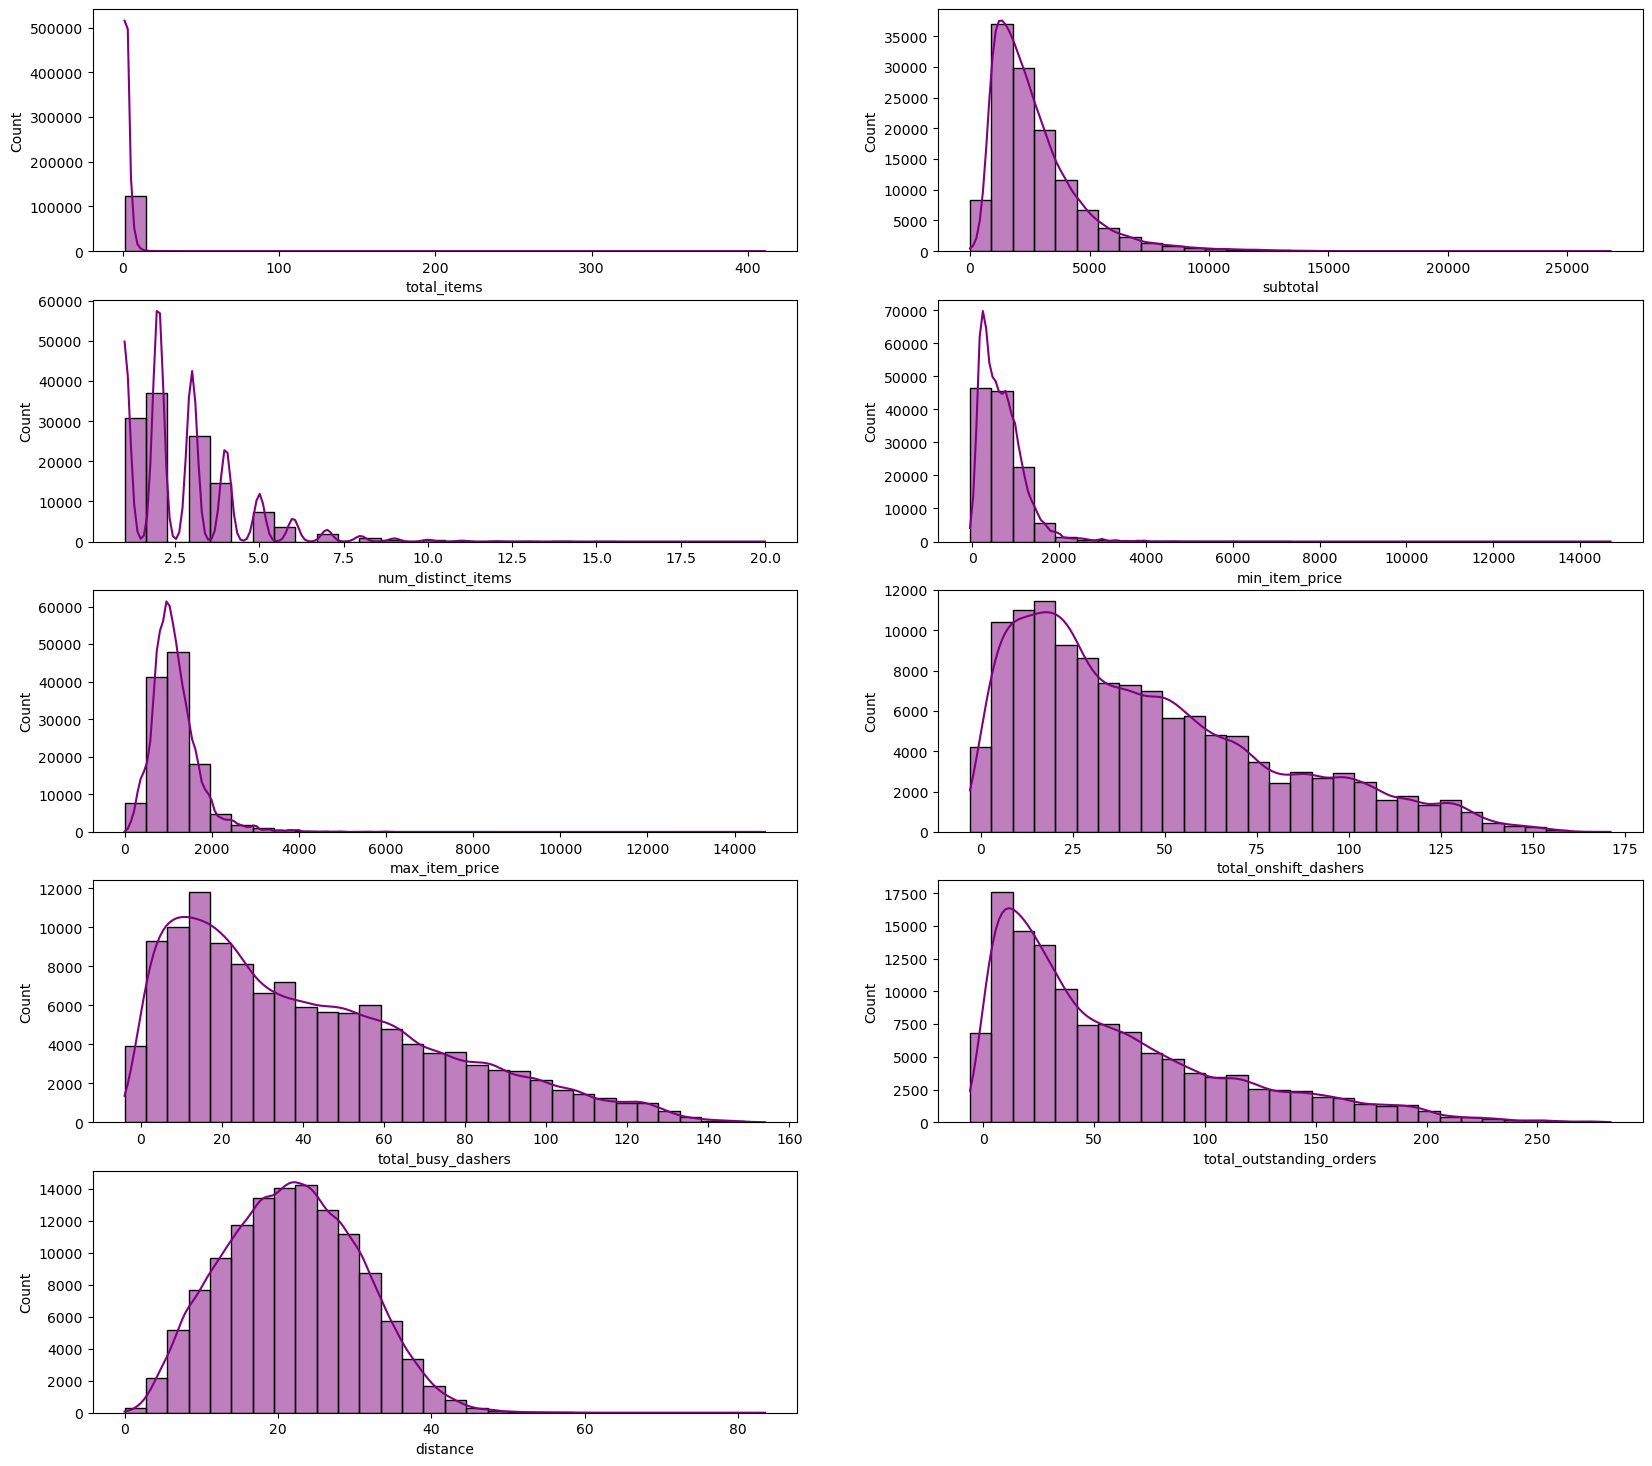

In [1904]:
# Plot distributions for all numerical columns

plt.figure(figsize=(20, 22))
i = 1
for n_col in num_col:
    plt.subplot(6,2,i)
    sns.histplot(X_train[n_col], bins=30, kde=True, color = 'purple')
    i += 1
plt.show()



##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

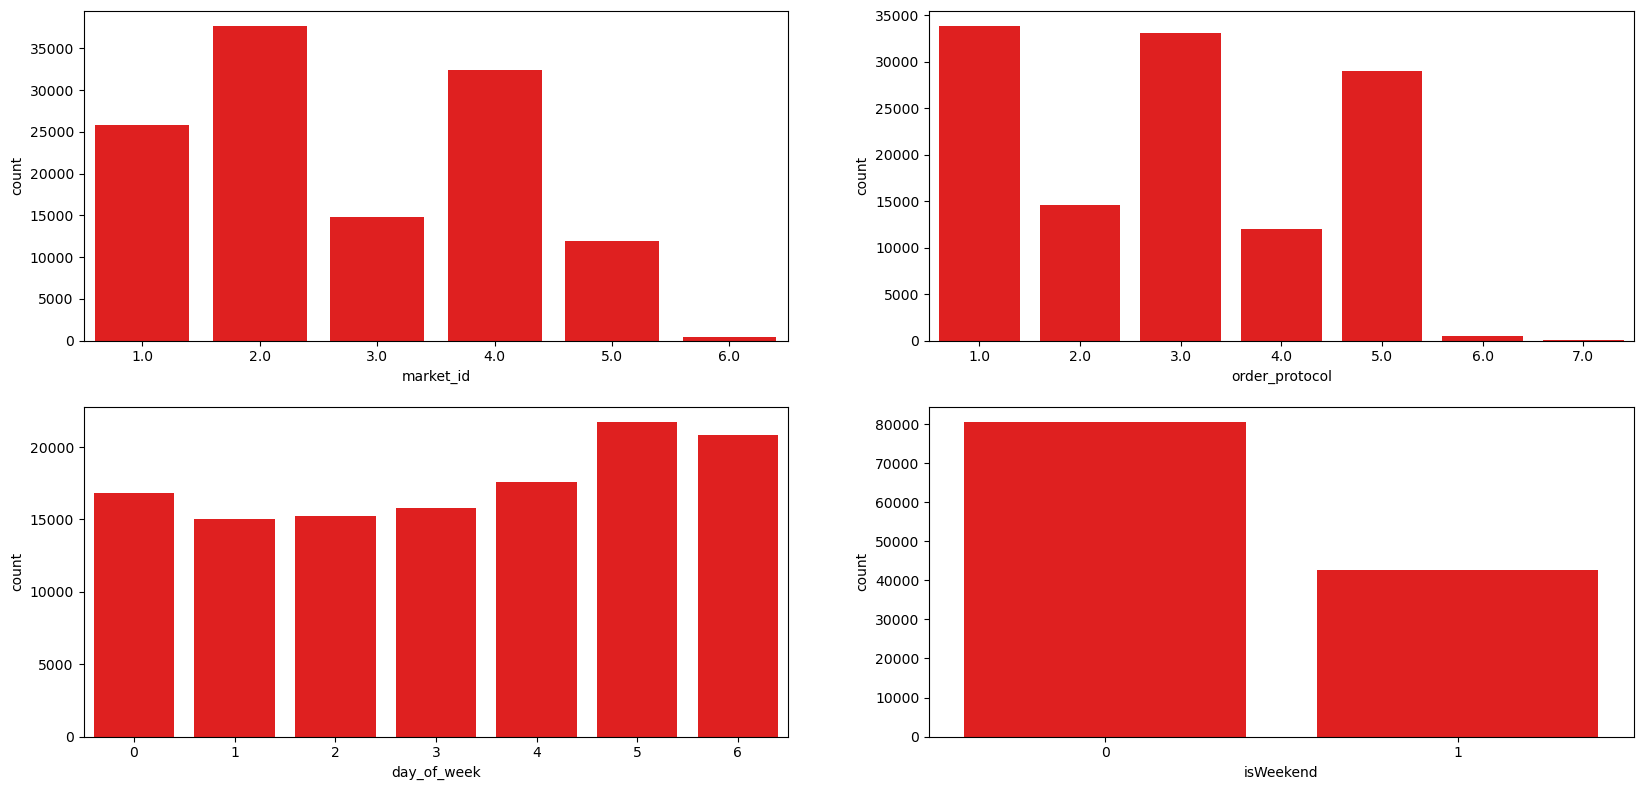

In [1906]:
# Distribution of categorical columns

plt.figure(figsize=(20, 30))
i = 1
for c_col in cat_col:
    plt.subplot(6,2,i)
    sns.countplot(data=X_train, x=c_col, color='red')
    i += 1
plt.show()



##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

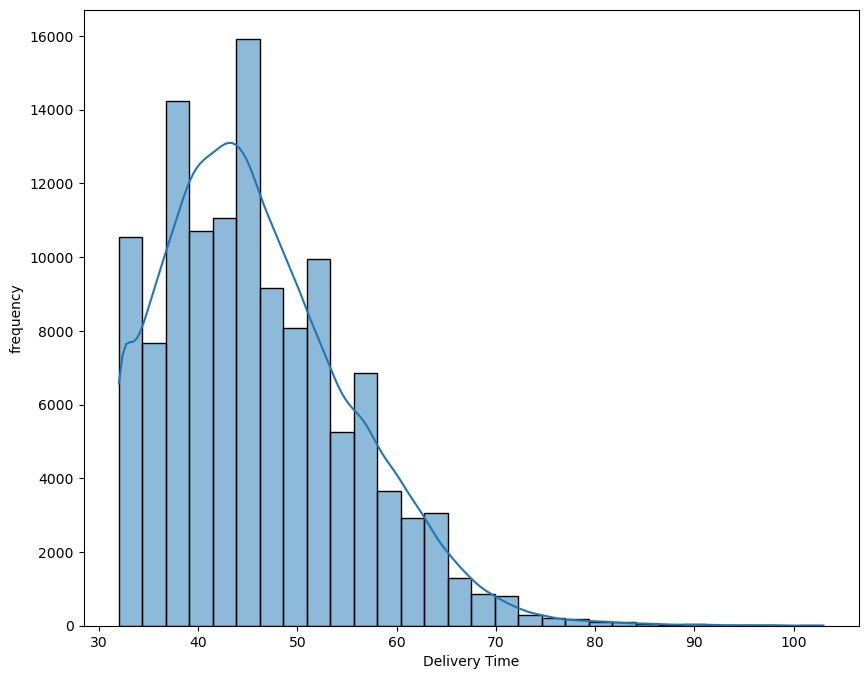

In [1908]:
# Distribution of time_taken
plt.figure(figsize=(10, 8))
sns.histplot(y_train, kde=True, bins=30)
plt.xlabel("Delivery Time")
plt.ylabel("frequency")
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

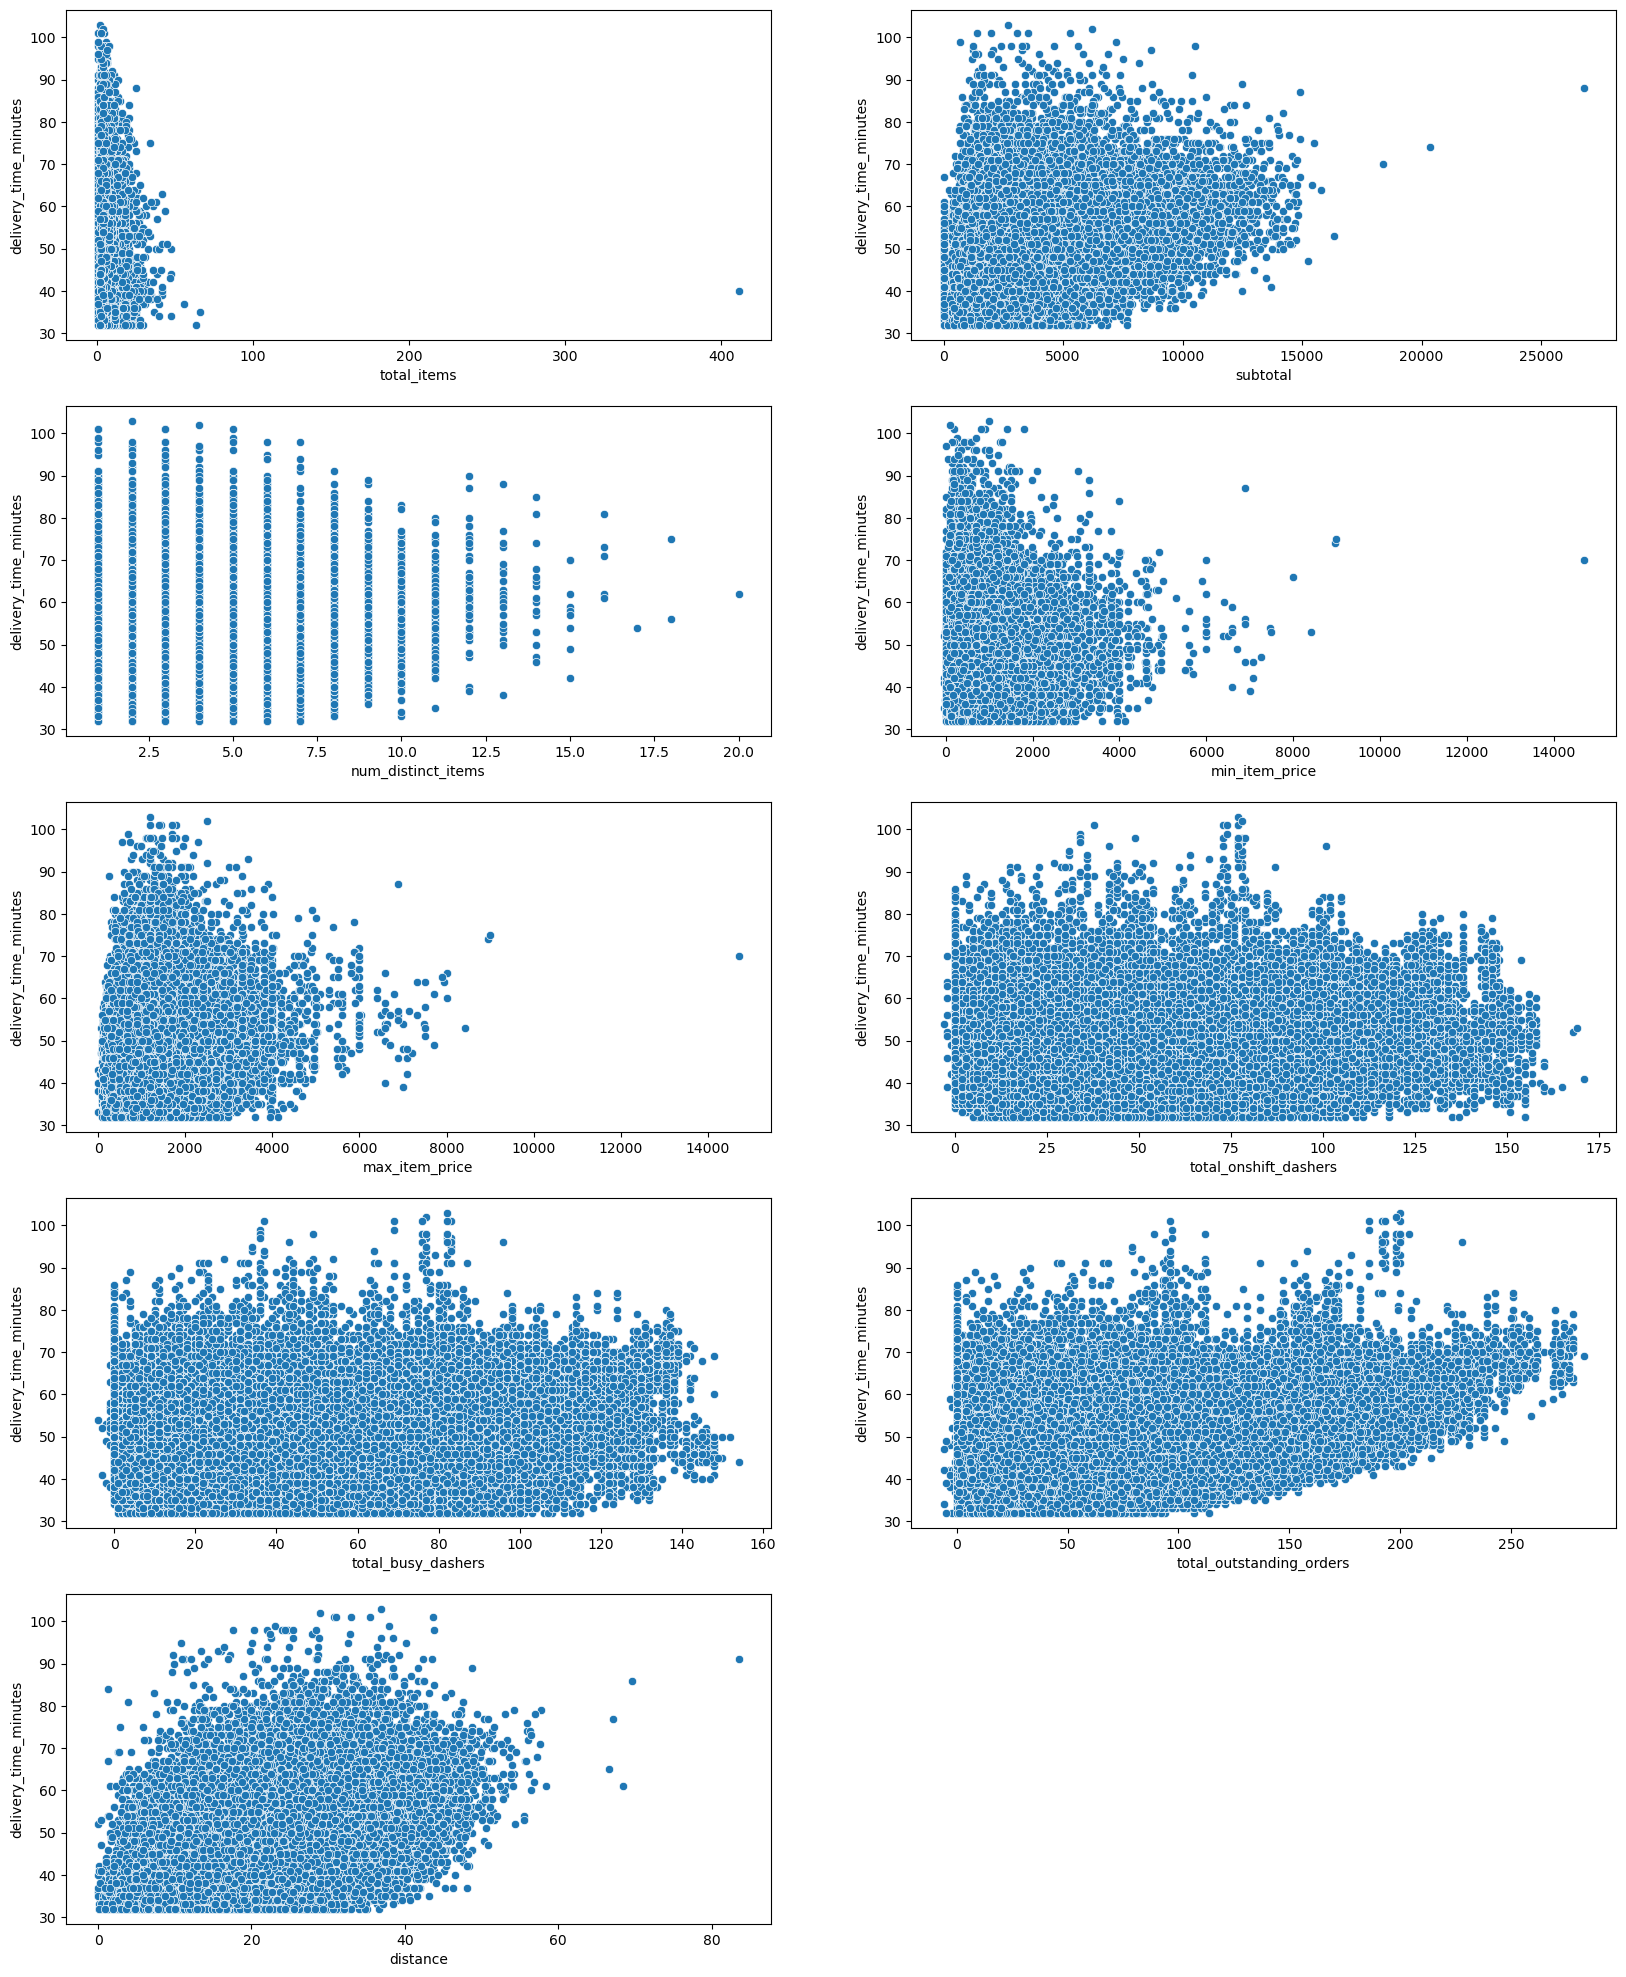

In [1911]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=(20, 30))
i = 1
for var in num_col:
    plt.subplot(6,2,i)
    sns.scatterplot(x=X_train[var], y=y_train)
    i += 1
plt.show()


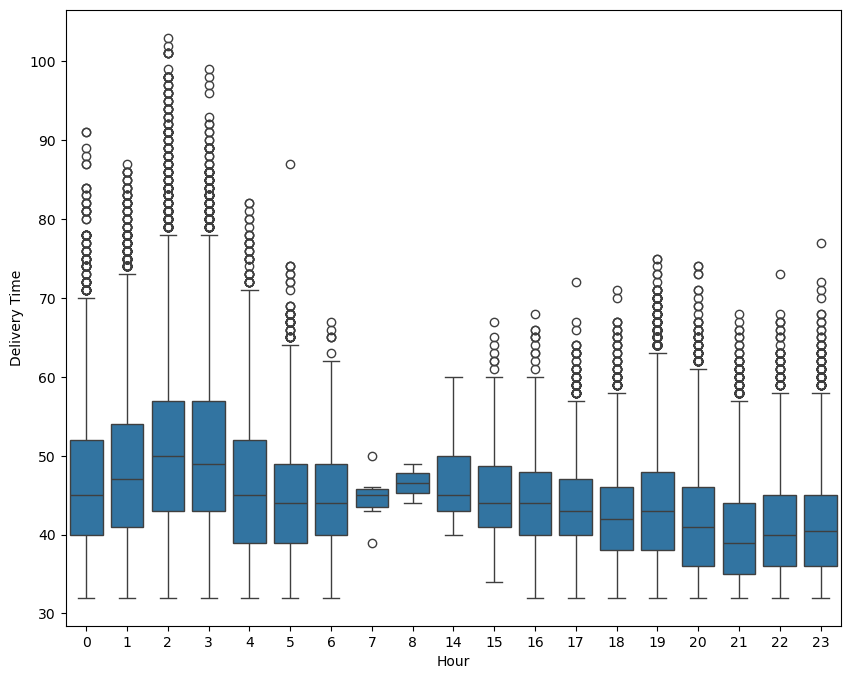

In [1912]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(10, 8))
sns.boxplot(x=X_train['hour'], y= y_train)
plt.xlabel("Hour")
plt.ylabel("Delivery Time")
plt.show()



#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

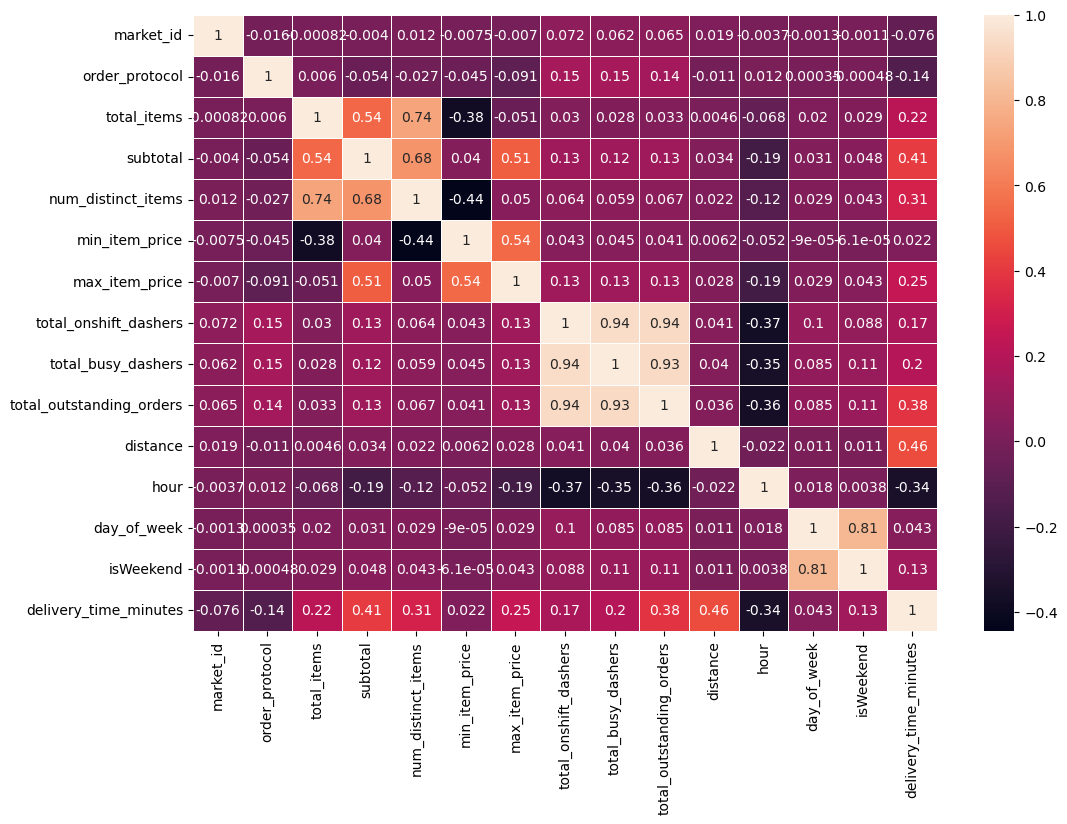

In [1915]:
# Plot the heatmap of the correlation matrix
traindata = X_train.copy()
traindata['delivery_time_minutes'] = y_train

plt.figure(figsize=(12,8))
sns.heatmap(traindata.corr(), annot=True, linewidth=0.5)
plt.show()



In [1916]:
traindata.corr()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour,day_of_week,isWeekend,delivery_time_minutes
market_id,1.000000,-0.015611,-0.000824,-0.004032,0.012186,-0.007467,-0.007013,0.071844,0.062236,0.065431,0.019365,-0.003703,-0.001251,-0.001119,-0.075735
order_protocol,-0.015611,1.000000,0.006016,-0.053707,-0.026847,-0.045057,-0.091298,0.148166,0.152328,0.137201,-0.010957,0.012127,0.000351,-0.000476,-0.137906
total_items,-0.000824,0.006016,1.000000,0.540844,0.739286,-0.378681,-0.050832,0.030266,0.027539,0.033203,0.004618,-0.068119,0.020351,0.029070,0.219104
subtotal,-0.004032,-0.053707,0.540844,1.000000,0.681539,0.040152,0.511598,0.127671,0.123587,0.128139,0.034334,-0.188313,0.031438,0.048239,0.412878
num_distinct_items,0.012186,-0.026847,0.739286,0.681539,1.000000,-0.444554,0.049857,0.064184,0.058774,0.066821,0.022432,-0.118291,0.029006,0.043300,0.313384
min_item_price,-0.007467,-0.045057,-0.378681,0.040152,-0.444554,1.000000,0.543289,0.043178,0.045229,0.041134,0.006240,-0.051680,-0.000090,-0.000061,0.022281
max_item_price,-0.007013,-0.091298,-0.050832,0.511598,0.049857,0.543289,1.000000,0.130630,0.129203,0.128575,0.027879,-0.188061,0.028634,0.043337,0.254671
total_onshift_dashers,0.071844,0.148166,0.030266,0.127671,0.064184,0.043178,0.130630,1.000000,0.943845,0.935953,0.041201,-0.374604,0.101709,0.088468,0.166812
total_busy_dashers,0.062236,0.152328,0.027539,0.123587,0.058774,0.045229,0.129203,0.943845,1.000000,0.933188,0.039816,-0.350275,0.084948,0.107290,0.202562
total_outstanding_orders,0.065431,0.137201,0.033203,0.128139,0.066821,0.041134,0.128575,0.935953,0.933188,1.000000,0.035808,-0.362394,0.085377,0.113303,0.381642


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [1918]:
# Drop 3-5 weakly correlated columns from training dataset
# By looking at the heatmap, it's clearly visible that market_id', min_item_price' have weak correlation.
X_train = X_train.drop(['market_id','min_item_price'], axis=1)


In [1919]:
X_train.head()

,order_protocol,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour,day_of_week,isWeekend
94746,5.0,2,1790,2,995,10.0,9.0,15.0,18.04,18,0,0
173338,5.0,1,845,1,795,134.0,76.0,136.0,24.28,2,5,1
37592,5.0,1,1900,1,1200,21.0,21.0,28.0,28.24,23,6,1
42763,4.0,6,463,3,299,98.0,87.0,129.0,13.88,1,5,1
27506,1.0,3,3500,3,1200,7.0,13.0,17.0,8.00,5,5,1


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

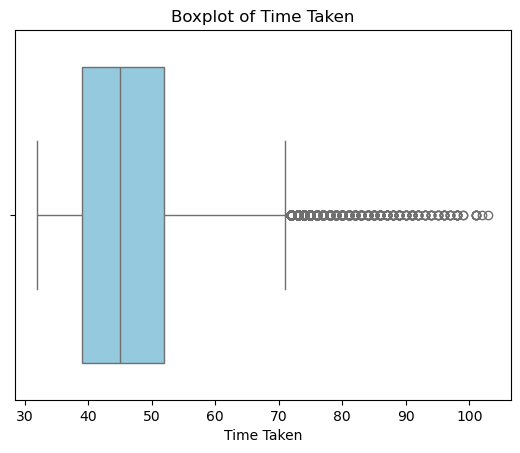

In [1922]:
# Boxplot for time_taken
sns.boxplot(data=X_train, x=y_train, color='skyblue')
plt.title('Boxplot of Time Taken')
plt.xlabel('Time Taken')
plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [1924]:
X_train.describe()

,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour,day_of_week,isWeekend
count,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000
mean,3.206082,2697.863625,2.674951,1160.434645,44.981177,41.879180,58.276651,21.830150,8.467251,3.225799,0.345960
std,2.745043,1830.338637,1.625552,562.955073,34.568806,32.149659,52.689697,8.765038,8.678470,2.041310,0.475682
min,1.000000,0.000000,1.000000,0.000000,-3.000000,-4.000000,-6.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1417.000000,2.000000,799.000000,17.000000,15.000000,17.000000,15.320000,2.000000,1.000000,0.000000
50%,3.000000,2220.000000,2.000000,1095.000000,37.000000,35.000000,41.000000,21.760000,3.000000,3.000000,0.000000
75%,4.000000,3405.000000,3.000000,1395.000000,66.000000,63.000000,85.000000,28.120000,19.000000,5.000000,1.000000
max,411.000000,26800.000000,20.000000,14700.000000,171.000000,154.000000,283.000000,83.520000,23.000000,6.000000,1.000000


### By looking at the describe() data, it is clearly visible that almost all numerical columns have outliers except hour, day_of_week and isWeekend

In [1926]:
cat_col = ['order_protocol', 'hour', 'isWeekend']

num_col = ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']

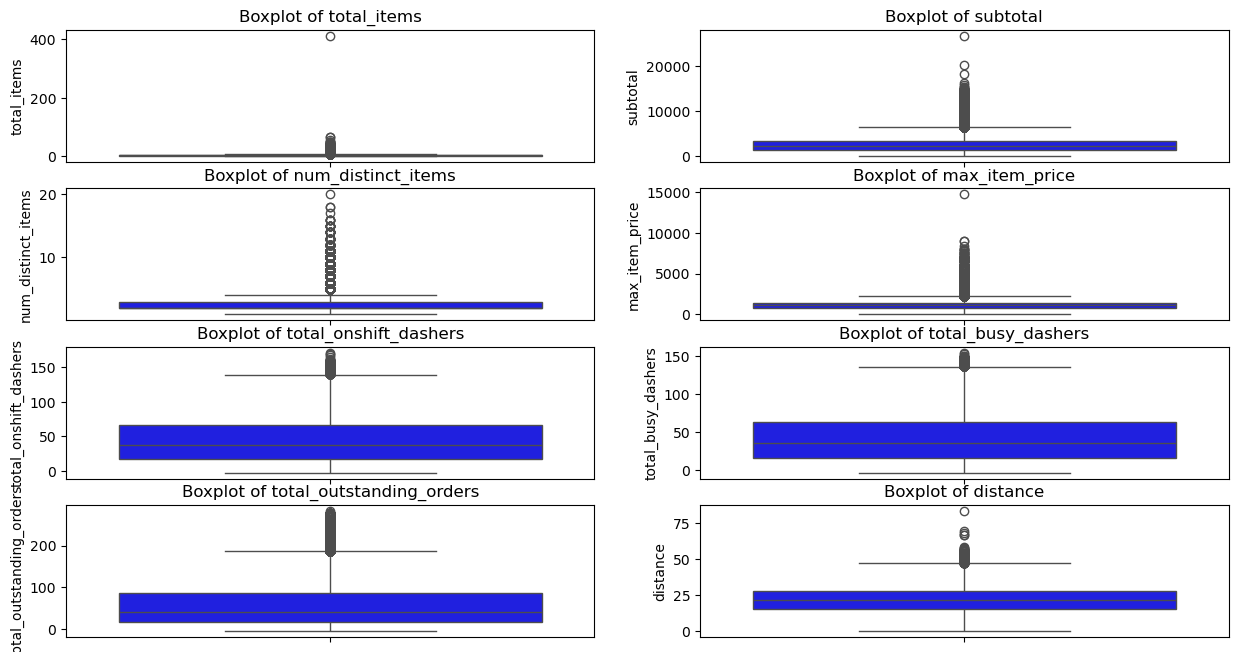

In [1927]:
plt.figure(figsize=(15,12))
i = 1
for var in num_col:
    plt.subplot(6,2,i)
    sns.boxplot(y=X_train[var], color="blue")
    plt.title(f"Boxplot of {var}")
    i += 1
plt.show()

In [1928]:
df = pd.DataFrame(X_train)

# Function to find outlier range for each column
def find_outliers(df):
    outlier_info = {}
    
    for col in num_col:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        outlier_info[col] = {
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Outliers': outliers[col].values.tolist()
        }
    
    return outlier_info

outliers_info = find_outliers(df)

for col, info in outliers_info.items():
    print(f"Outlier Info for Column '{col}':")
    print(f"  Q1: {info['Q1']}")
    print(f"  Q3: {info['Q3']}")
    print(f"  IQR: {info['IQR']}")
    print(f"  Lower Bound: {info['Lower Bound']}")
    print(f"  Upper Bound: {info['Upper Bound']}")

Outlier Info for Column 'total_items':
  Q1: 2.0
  Q3: 4.0
  IQR: 2.0
  Lower Bound: -1.0
  Upper Bound: 7.0
Outlier Info for Column 'subtotal':
  Q1: 1417.0
  Q3: 3405.0
  IQR: 1988.0
  Lower Bound: -1565.0
  Upper Bound: 6387.0
Outlier Info for Column 'num_distinct_items':
  Q1: 2.0
  Q3: 3.0
  IQR: 1.0
  Lower Bound: 0.5
  Upper Bound: 4.5
Outlier Info for Column 'max_item_price':
  Q1: 799.0
  Q3: 1395.0
  IQR: 596.0
  Lower Bound: -95.0
  Upper Bound: 2289.0
Outlier Info for Column 'total_onshift_dashers':
  Q1: 17.0
  Q3: 66.0
  IQR: 49.0
  Lower Bound: -56.5
  Upper Bound: 139.5
Outlier Info for Column 'total_busy_dashers':
  Q1: 15.0
  Q3: 63.0
  IQR: 48.0
  Lower Bound: -57.0
  Upper Bound: 135.0
Outlier Info for Column 'total_outstanding_orders':
  Q1: 17.0
  Q3: 85.0
  IQR: 68.0
  Lower Bound: -85.0
  Upper Bound: 187.0
Outlier Info for Column 'distance':
  Q1: 15.32
  Q3: 28.12
  IQR: 12.8
  Lower Bound: -3.8800000000000026
  Upper Bound: 47.32000000000001


In [1929]:
X_train.shape, y_train.shape

((123043, 12), (123043,))

In [1930]:
# Drop the data above the upper range in all numerical variables
y_train.drop(index=X_train[X_train['total_items']>7].index, inplace=True)
X_train.drop(index=X_train[X_train['total_items']>7].index, inplace=True)

In [1931]:
y_train.drop(index=X_train[X_train['subtotal']>6387].index, inplace=True)
X_train.drop(index=X_train[X_train['subtotal']>6387].index, inplace=True)

In [1932]:
y_train.drop(index=X_train[X_train['num_distinct_items']>4.5].index, inplace=True)
X_train.drop(index=X_train[X_train['num_distinct_items']>4.5].index, inplace=True)

In [1933]:
y_train.drop(index=X_train[X_train['max_item_price']>2289].index, inplace=True)
X_train.drop(index=X_train[X_train['max_item_price']>2289].index, inplace=True)

In [1934]:
y_train.drop(index=X_train[X_train['total_onshift_dashers']>139.5].index, inplace=True)
X_train.drop(index=X_train[X_train['total_onshift_dashers']>139.5].index, inplace=True)

In [1935]:
y_train.drop(index=X_train[X_train['total_busy_dashers']>135].index, inplace=True)
X_train.drop(index=X_train[X_train['total_busy_dashers']>135].index, inplace=True)

In [1936]:
y_train.drop(index=X_train[X_train['total_outstanding_orders']>187].index, inplace=True)
X_train.drop(index=X_train[X_train['total_outstanding_orders']>187].index, inplace=True)

In [1937]:
y_train.drop(index=X_train[X_train['distance']>47.32].index, inplace=True)
X_train.drop(index=X_train[X_train['distance']>47.32].index, inplace=True)

In [1938]:
X_train.shape, y_train.shape

((98775, 12), (98775,))

In [1939]:
# Handle outliers
condition = (y_train <= 69)
X_train = X_train[condition]
y_train = y_train[condition]


In [1940]:
X_train.shape, y_train.shape

((98026, 12), (98026,))

In [1941]:
X_train.head()

,order_protocol,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour,day_of_week,isWeekend
94746,5.0,2,1790,2,995,10.0,9.0,15.0,18.04,18,0,0
173338,5.0,1,845,1,795,134.0,76.0,136.0,24.28,2,5,1
37592,5.0,1,1900,1,1200,21.0,21.0,28.0,28.24,23,6,1
42763,4.0,6,463,3,299,98.0,87.0,129.0,13.88,1,5,1
27506,1.0,3,3500,3,1200,7.0,13.0,17.0,8.00,5,5,1


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [1943]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [1946]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [1948]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [1950]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [1952]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [1954]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [1957]:
# Import libraries
import statsmodels

import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.feature_selection import RFE


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [1959]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98026 entries, 94746 to 38408
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   order_protocol            98026 non-null  category
 1   total_items               98026 non-null  int64   
 2   subtotal                  98026 non-null  int64   
 3   num_distinct_items        98026 non-null  int64   
 4   max_item_price            98026 non-null  int64   
 5   total_onshift_dashers     98026 non-null  float64 
 6   total_busy_dashers        98026 non-null  float64 
 7   total_outstanding_orders  98026 non-null  float64 
 8   distance                  98026 non-null  float64 
 9   hour                      98026 non-null  int32   
 10  day_of_week               98026 non-null  int32   
 11  isWeekend                 98026 non-null  int64   
dtypes: category(1), float64(4), int32(2), int64(5)
memory usage: 8.3 MB


In [1960]:
X_test.head()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour,day_of_week,isWeekend
139667,1.0,1.0,3,1295,2,150,995,59.0,59.0,61.0,20.56,3,4,0
80077,1.0,1.0,2,2950,1,1225,1225,18.0,17.0,16.0,12.84,1,5,1
41872,1.0,4.0,1,1395,1,1395,1395,28.0,27.0,45.0,16.80,3,3,0
165269,4.0,5.0,2,2967,2,1097,1249,124.0,127.0,200.0,19.00,3,5,1
151215,4.0,2.0,3,1250,2,375,400,39.0,30.0,33.0,26.72,22,5,1


In [1961]:
# Apply scaling to the numerical columns
scaler = MinMaxScaler()

num_vars = ['order_protocol','total_items', 'subtotal', 'num_distinct_items',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'hour', 'day_of_week', 'isWeekend']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()



,order_protocol,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour,day_of_week,isWeekend
94746,0.666667,0.166667,0.280564,0.333333,0.435068,0.091549,0.093525,0.108808,0.381234,0.782609,0.000000,0.0
173338,0.666667,0.000000,0.132445,0.000000,0.347617,0.964789,0.575540,0.735751,0.513102,0.086957,0.833333,1.0
37592,0.666667,0.000000,0.297806,0.000000,0.524705,0.169014,0.179856,0.176166,0.596788,1.000000,1.000000,1.0
42763,0.500000,0.833333,0.072571,0.666667,0.130739,0.711268,0.654676,0.699482,0.293322,0.043478,0.833333,1.0
27506,0.000000,0.333333,0.548589,0.666667,0.524705,0.070423,0.122302,0.119171,0.169062,0.217391,0.833333,1.0


In [1962]:
X_train.describe()

,order_protocol,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour,day_of_week,isWeekend
count,98026.000000,98026.000000,98026.000000,98026.000000,98026.000000,98026.000000,98026.000000,98026.000000,98026.000000,98026.000000,98026.000000,98026.000000
mean,0.320386,0.253604,0.341400,0.400921,0.468798,0.312503,0.306600,0.299329,0.457344,0.396976,0.530482,0.326801
std,0.253768,0.211059,0.177962,0.330980,0.174090,0.220273,0.210769,0.233405,0.182939,0.384485,0.336828,0.469046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.166667,0.203448,0.000000,0.347617,0.133803,0.129496,0.113990,0.320372,0.086957,0.166667,0.000000
50%,0.333333,0.166667,0.305486,0.333333,0.447748,0.260563,0.258993,0.222798,0.456467,0.173913,0.500000,0.000000
75%,0.500000,0.333333,0.442790,0.666667,0.568430,0.443662,0.446043,0.424870,0.590025,0.826087,0.833333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1963]:
X_train.columns

Index(['order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'hour', 'day_of_week',
       'isWeekend'],
      dtype='object')

In [1964]:
X_test.columns

Index(['market_id', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'hour', 'day_of_week',
       'isWeekend'],
      dtype='object')

In [1965]:
# Drop the columns from test data set as well

X_test = X_test.drop(['market_id','min_item_price'], axis=1)

In [1966]:
X_test.columns

Index(['order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'hour', 'day_of_week',
       'isWeekend'],
      dtype='object')

In [1967]:
# Transform the test data set
num_vars = ['order_protocol','total_items', 'subtotal', 'num_distinct_items',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'hour', 'day_of_week', 'isWeekend']

X_test[num_vars] = scaler.transform(X_test[num_vars])
X_test.head()

,order_protocol,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour,day_of_week,isWeekend
139667,0.000000,0.333333,0.202978,0.333333,0.435068,0.436620,0.453237,0.347150,0.434489,0.130435,0.666667,0.0
80077,0.000000,0.166667,0.462382,0.000000,0.535636,0.147887,0.151079,0.113990,0.271344,0.043478,0.833333,1.0
41872,0.500000,0.000000,0.218652,0.000000,0.609969,0.218310,0.223022,0.264249,0.355030,0.130435,0.500000,0.0
165269,0.666667,0.166667,0.465047,0.333333,0.546130,0.894366,0.942446,1.067358,0.401522,0.130435,0.833333,1.0
151215,0.166667,0.333333,0.195925,0.333333,0.174902,0.295775,0.244604,0.202073,0.564666,0.956522,0.833333,1.0


In [1968]:
X_test.describe()

,order_protocol,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour,day_of_week,isWeekend
count,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000
mean,0.318226,0.367066,0.422469,0.558438,0.507002,0.336428,0.329639,0.332236,0.462242,0.369038,0.535685,0.344806
std,0.252375,0.416770,0.285956,0.541998,0.243043,0.242876,0.231746,0.273719,0.184077,0.377087,0.341640,0.475309
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.007042,-0.007194,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.166667,0.219436,0.000000,0.349366,0.140845,0.136691,0.119171,0.325444,0.086957,0.166667,0.000000
50%,0.333333,0.333333,0.348746,0.333333,0.478793,0.281690,0.280576,0.243523,0.461538,0.130435,0.500000,0.000000
75%,0.500000,0.500000,0.535266,0.666667,0.609969,0.478873,0.474820,0.471503,0.595097,0.826087,0.833333,1.000000
max,1.000000,9.666667,3.526646,6.000000,3.716659,1.176056,1.122302,1.507772,1.307692,1.000000,1.000000,1.000000


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

## 1st Model

In [1973]:
# Create/Initialise the model
X_train_sm = sm.add_constant(X_train)

In [1974]:
X_train_sm.head()

,const,order_protocol,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour,day_of_week,isWeekend
94746,1.0,0.666667,0.166667,0.280564,0.333333,0.435068,0.091549,0.093525,0.108808,0.381234,0.782609,0.000000,0.0
173338,1.0,0.666667,0.000000,0.132445,0.000000,0.347617,0.964789,0.575540,0.735751,0.513102,0.086957,0.833333,1.0
37592,1.0,0.666667,0.000000,0.297806,0.000000,0.524705,0.169014,0.179856,0.176166,0.596788,1.000000,1.000000,1.0
42763,1.0,0.500000,0.833333,0.072571,0.666667,0.130739,0.711268,0.654676,0.699482,0.293322,0.043478,0.833333,1.0
27506,1.0,0.000000,0.333333,0.548589,0.666667,0.524705,0.070423,0.122302,0.119171,0.169062,0.217391,0.833333,1.0


In [1975]:
# Create/Initialise the model for test set
X_test_sm = sm.add_constant(X_test)

In [1976]:
X_test_sm.head()

,const,order_protocol,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour,day_of_week,isWeekend
139667,1.0,0.000000,0.333333,0.202978,0.333333,0.435068,0.436620,0.453237,0.347150,0.434489,0.130435,0.666667,0.0
80077,1.0,0.000000,0.166667,0.462382,0.000000,0.535636,0.147887,0.151079,0.113990,0.271344,0.043478,0.833333,1.0
41872,1.0,0.500000,0.000000,0.218652,0.000000,0.609969,0.218310,0.223022,0.264249,0.355030,0.130435,0.500000,0.0
165269,1.0,0.666667,0.166667,0.465047,0.333333,0.546130,0.894366,0.942446,1.067358,0.401522,0.130435,0.833333,1.0
151215,1.0,0.166667,0.333333,0.195925,0.333333,0.174902,0.295775,0.244604,0.202073,0.564666,0.956522,0.833333,1.0


In [1977]:
# Create Model
lr = sm.OLS(y_train, X_train_sm)

In [1978]:
# Train the model using the training data
# Fit the model
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     delivery_time_minutes   R-squared:                       0.859
Model:                               OLS   Adj. R-squared:                  0.859
Method:                    Least Squares   F-statistic:                 4.994e+04
Date:                   Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                           01:21:32   Log-Likelihood:            -2.4708e+05
No. Observations:                  98026   AIC:                         4.942e+05
Df Residuals:                      98013   BIC:                         4.943e+05
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       35.0565      0.050    705.202      0.000      34.959      35.154
order_protocol              -3.8925      0.039   -100.646      0.000      -3.968      -3.817
total_items                 -0.4830      0.099     -4.871      0.000      -0.677      -0.289
subtotal                     8.4841      0.102     82.830      0.000       8.283       8.685
num_distinct_items           1.4569      0.055     26.644      0.000       1.350       1.564
max_item_price               1.1808      0.085     13.841      0.000       1.014       1.348
total_onshift_dashers      -52.2586      0.149   -350.305      0.000     -52.551     -51.966
total_busy_dashers         -18.9793      0.146   -129.785      0.000     -19.266     -18.693
total_outstanding_orders    67.9804      0.129    528.129      0.000      67.728      68.233
distance                    22.0129      0.053    418.304      0.000      21.910      22.116
hour                        -5.3490      0.027   -194.960      0.000      -5.403      -5.295
day_of_week                  0.0284      0.049      0.585      0.559      -0.067       0.124
isWeekend                    1.4863      0.035     42.565      0.000       1.418       1.555
==============================================================================
Omnibus:                    24933.915   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65709.232
Skew:                           1.375   Prob(JB):                         0.00
Kurtosis:                       5.919   Cond. No.                         32.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1979]:
# Make predictions
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred

139667    38.682745
80077     43.935203
41872     45.139708
165269    55.042130
151215    39.062535
            ...    
46607     51.588530
159653    41.783802
78090     37.372877
98746     62.324136
3735      49.880708
Length: 52734, dtype: float64

In [1980]:
# Find results for evaluation metrics

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 2.34
Mean Squared Error (MSE): 11.05
Root Mean Squared Error (RMSE): 3.32
R² Score: 0.8727


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [1984]:
# Loop through the number of features and test the model

model = LinearRegression()

rfe = RFE(estimator=model, n_features_to_select=(X_train.shape[1]-1))


In [1985]:
# Fit RFE on training data
rfe.fit_transform(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('order_protocol', True, 1),
 ('total_items', True, 1),
 ('subtotal', True, 1),
 ('num_distinct_items', True, 1),
 ('max_item_price', True, 1),
 ('total_onshift_dashers', True, 1),
 ('total_busy_dashers', True, 1),
 ('total_outstanding_orders', True, 1),
 ('distance', True, 1),
 ('hour', True, 1),
 ('day_of_week', False, 2),
 ('isWeekend', True, 1)]

In [1986]:
# Get the selected features
selected_features = X_train.columns[rfe.get_support()]

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'hour', 'isWeekend'],
      dtype='object')


In [1987]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

### 2nd Model

In [1989]:
# Creating the model again after removing day_of_week

# Add a constant
X_train_sm = sm.add_constant(X_train)

# Create Model
lr = sm.OLS(y_train, X_train_sm)

# Fit the model
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     delivery_time_minutes   R-squared:                       0.859
Model:                               OLS   Adj. R-squared:                  0.859
Method:                    Least Squares   F-statistic:                 5.448e+04
Date:                   Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                           01:21:33   Log-Likelihood:            -2.4708e+05
No. Observations:                  98026   AIC:                         4.942e+05
Df Residuals:                      98014   BIC:                         4.943e+05
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       35.0655      0.047    741.754      0.000      34.973      35.158
order_protocol              -3.8927      0.039   -100.656      0.000      -3.969      -3.817
total_items                 -0.4830      0.099     -4.872      0.000      -0.677      -0.289
subtotal                     8.4840      0.102     82.830      0.000       8.283       8.685
num_distinct_items           1.4569      0.055     26.644      0.000       1.350       1.564
max_item_price               1.1807      0.085     13.840      0.000       1.013       1.348
total_onshift_dashers      -52.2425      0.147   -356.290      0.000     -52.530     -51.955
total_busy_dashers         -18.9896      0.145   -130.807      0.000     -19.274     -18.705
total_outstanding_orders    67.9759      0.128    529.019      0.000      67.724      68.228
distance                    22.0131      0.053    418.321      0.000      21.910      22.116
hour                        -5.3483      0.027   -195.077      0.000      -5.402      -5.295
isWeekend                    1.5028      0.021     72.884      0.000       1.462       1.543
==============================================================================
Omnibus:                    24886.516   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65475.790
Skew:                           1.373   Prob(JB):                         0.00
Kurtosis:                       5.913   Cond. No.                         29.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1990]:
# Add a constant in test
X_test_sm = sm.add_constant(X_test)

In [1991]:
# Make predictions
y_test_pred = lr_model.predict(X_test_sm)

In [1992]:
# Find results for evaluation metrics

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 2.34
Mean Squared Error (MSE): 11.05
Root Mean Squared Error (RMSE): 3.32
R² Score: 0.8727




### Check one more time if any variable can be removed

In [1994]:
# Initialize the model
model = LinearRegression()


rfe = RFE(estimator=model, n_features_to_select=(X_train.shape[1]-2))

In [1995]:
# Fit the model on training data
rfe.fit_transform(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('order_protocol', True, 1),
 ('total_items', False, 3),
 ('subtotal', True, 1),
 ('num_distinct_items', False, 2),
 ('max_item_price', True, 1),
 ('total_onshift_dashers', True, 1),
 ('total_busy_dashers', True, 1),
 ('total_outstanding_orders', True, 1),
 ('distance', True, 1),
 ('hour', True, 1),
 ('isWeekend', True, 1)]

In [1996]:
# Get selected features
selected_features = X_train.columns[rfe.get_support()]

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['order_protocol', 'subtotal', 'max_item_price', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour',
       'isWeekend'],
      dtype='object')


In [1997]:
# Transform data to only keep selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

### 3rd Model

In [1999]:
# Creating the model again after removing day_of_week

# Add a constant
X_train_sm = sm.add_constant(X_train)

# Create Model
lr = sm.OLS(y_train, X_train_sm)

# Fit the model
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     delivery_time_minutes   R-squared:                       0.858
Model:                               OLS   Adj. R-squared:                  0.858
Method:                    Least Squares   F-statistic:                 6.574e+04
Date:                   Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                           01:21:35   Log-Likelihood:            -2.4762e+05
No. Observations:                  98026   AIC:                         4.953e+05
Df Residuals:                      98016   BIC:                         4.953e+05
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       35.3429      0.045    788.443      0.000      35.255      35.431
order_protocol              -3.9299      0.039   -101.103      0.000      -4.006      -3.854
subtotal                    10.1274      0.067    151.115      0.000       9.996      10.259
max_item_price               0.4163      0.068      6.088      0.000       0.282       0.550
total_onshift_dashers      -52.2017      0.147   -354.074      0.000     -52.491     -51.913
total_busy_dashers         -19.0456      0.146   -130.482      0.000     -19.332     -18.760
total_outstanding_orders    67.9779      0.129    526.146      0.000      67.725      68.231
distance                    22.0200      0.053    416.160      0.000      21.916      22.124
hour                        -5.3788      0.028   -195.228      0.000      -5.433      -5.325
isWeekend                    1.5219      0.021     73.440      0.000       1.481       1.563
==============================================================================
Omnibus:                    24110.328   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61996.734
Skew:                           1.340   Prob(JB):                         0.00
Kurtosis:                       5.827   Cond. No.                         28.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2000]:
# Add a constant in test
X_test_sm = sm.add_constant(X_test)

In [2001]:
# Make predictions
y_test_pred = lr_model.predict(X_test_sm)

In [2002]:
# Find results for evaluation metrics

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)


print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 2.37
Mean Squared Error (MSE): 11.30
Root Mean Squared Error (RMSE): 3.36
R² Score: 0.8698




### Check one last more time if any variable can be removed

In [2004]:
# Initialize the model
model = LinearRegression()

rfe = RFE(estimator=model, n_features_to_select=(X_train.shape[1]-3))

In [2005]:
# Fit the model on training data
rfe.fit_transform(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('order_protocol', False, 2),
 ('subtotal', True, 1),
 ('max_item_price', False, 4),
 ('total_onshift_dashers', True, 1),
 ('total_busy_dashers', True, 1),
 ('total_outstanding_orders', True, 1),
 ('distance', True, 1),
 ('hour', True, 1),
 ('isWeekend', False, 3)]

In [2006]:
# Get selected features
selected_features = X_train.columns[rfe.get_support()]

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['subtotal', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'hour'],
      dtype='object')


In [2007]:
# Transform data to only keep selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

### 4th Model

In [2009]:
# Creating the model again after removing total_items and num_distinct_items

# Add a constant
X_train_sm = sm.add_constant(X_train)

# Create Model
lr = sm.OLS(y_train, X_train_sm)

# Fit the model
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     delivery_time_minutes   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.835
Method:                    Least Squares   F-statistic:                 8.255e+04
Date:                   Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                           01:21:36   Log-Likelihood:            -2.5499e+05
No. Observations:                  98026   AIC:                         5.100e+05
Df Residuals:                      98019   BIC:                         5.101e+05
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       34.6984      0.041    836.576      0.000      34.617      34.780
subtotal                    11.0125      0.060    183.306      0.000      10.895      11.130
total_onshift_dashers      -53.2507      0.159   -335.670      0.000     -53.562     -52.940
total_busy_dashers         -19.1701      0.157   -122.087      0.000     -19.478     -18.862
total_outstanding_orders    68.3947      0.139    491.188      0.000      68.122      68.668
distance                    22.1283      0.057    387.949      0.000      22.017      22.240
hour                        -5.4608      0.030   -184.732      0.000      -5.519      -5.403
==============================================================================
Omnibus:                    14868.926   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28923.435
Skew:                           0.947   Prob(JB):                         0.00
Kurtosis:                       4.870   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2010]:
# Add a constant in test
X_test_sm = sm.add_constant(X_test)

In [2011]:
# Make predictions
y_test_pred = lr_model.predict(X_test_sm)

In [2012]:
# Find results for evaluation metrics

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)


print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 2.59
Mean Squared Error (MSE): 12.66
Root Mean Squared Error (RMSE): 3.56
R² Score: 0.8542


#### All the models are almost similar with just minor difference in the R2, so we are considering the last model as final model.

In [2014]:
# Build the final model with selected number of features

X_train.sm = sm.add_constant(X_train)

In [2015]:
# Create Model
lr = sm.OLS(y_train, X_train_sm)

# Fit the model
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     delivery_time_minutes   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.835
Method:                    Least Squares   F-statistic:                 8.255e+04
Date:                   Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                           01:21:36   Log-Likelihood:            -2.5499e+05
No. Observations:                  98026   AIC:                         5.100e+05
Df Residuals:                      98019   BIC:                         5.101e+05
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       34.6984      0.041    836.576      0.000      34.617      34.780
subtotal                    11.0125      0.060    183.306      0.000      10.895      11.130
total_onshift_dashers      -53.2507      0.159   -335.670      0.000     -53.562     -52.940
total_busy_dashers         -19.1701      0.157   -122.087      0.000     -19.478     -18.862
total_outstanding_orders    68.3947      0.139    491.188      0.000      68.122      68.668
distance                    22.1283      0.057    387.949      0.000      22.017      22.240
hour                        -5.4608      0.030   -184.732      0.000      -5.519      -5.403
==============================================================================
Omnibus:                    14868.926   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28923.435
Skew:                           0.947   Prob(JB):                         0.00
Kurtosis:                       4.870   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2016]:
X_test_sm = sm.add_constant(X_test)

In [2017]:
# Make predictions
y_test_pred = lr_model.predict(X_test_sm)

In [2018]:
final_coef=lr_model.params
final_coef

const                       34.698378
subtotal                    11.012462
total_onshift_dashers      -53.250700
total_busy_dashers         -19.170141
total_outstanding_orders    68.394668
distance                    22.128334
hour                        -5.460835
dtype: float64

In [2019]:
# Find results for evaluation metrics

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 2.59
Mean Squared Error (MSE): 12.66
Root Mean Squared Error (RMSE): 3.56
R² Score: 0.8542


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [2022]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
residuals = y_test - y_test_pred


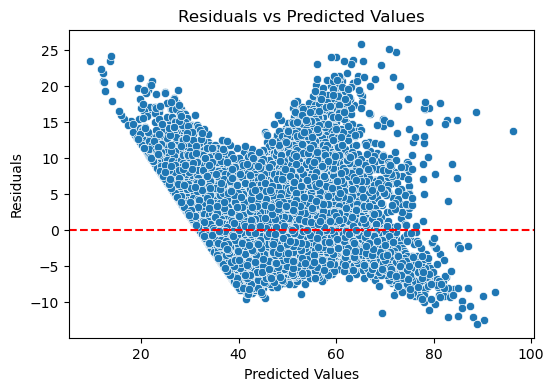

In [2023]:
#residuals vs predicted values
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

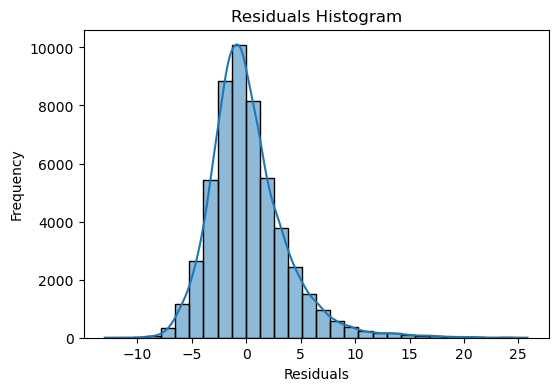

In [2024]:
# Residual Histogram
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Histogram")
plt.show()

[Your inferences here:]



## 1. Residuals vs. Predicted
        Residuals are almost randomly scattered around zero with no clear pattern.

## 2. Residuals Histogram
        The error terms are normally distributed which satisfies one of the assumptions.

        

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [2029]:
X_train.columns

Index(['subtotal', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'hour'],
      dtype='object')

In [2030]:
# Compare the scaled vs unscaled features used in the final model

#Extracting the Coef
coef_scaled = final_coef
coef_scaled = coef_scaled.drop('const')

# Extracting the features
final_features = X_train.columns

# Create dataframe
coef_df = pd.DataFrame({"Feature": final_features, "Scaled_Coef": coef_scaled})

# Separating numerical features
num_features = ['subtotal', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'hour']

# Calculate standard deviation
feature_sd = X_train[num_features].std()

#  Compute unscaled coefficients for numerical features
coef_df["Unscaled_Coef"] = np.nan
coef_df.loc[coef_df["Feature"].isin(num_features), "Unscaled_Coef"] = (
    coef_df.loc[coef_df["Feature"].isin(num_features), "Scaled_Coef"].values 
    / feature_sd.values
)

# Sort by absolute impact
#coef_df["Absolute Impact"] = np.abs(coef_df["Unscaled Coefficient"])
#coef_df = coef_df.sort_values(by="Absolute Impact", ascending=False)

# Display the coefficient comparison
print(coef_df[["Feature", "Scaled_Coef", "Unscaled_Coef"]])

                                           Feature  Scaled_Coef  Unscaled_Coef
subtotal                                  subtotal    11.012462      61.880985
total_onshift_dashers        total_onshift_dashers   -53.250700    -241.748818
total_busy_dashers              total_busy_dashers   -19.170141     -90.953517
total_outstanding_orders  total_outstanding_orders    68.394668     293.029990
distance                                  distance    22.128334     120.960194
hour                                          hour    -5.460835     -14.202989


In [2031]:
# Analyze the effect of a unit change in a feature, say 'total_items'

unit_change = 1  #  define unit change total_items

# Get the coefficient for 'total_items'
coef_total_outstanding_orders = coef_df.loc[coef_df["Feature"] == "total_outstanding_orders", "Scaled_Coef"].values[0]

impact_on_time_taken = round(unit_change * coef_total_outstanding_orders,2)

print("Impact of unit change in total_items is :", impact_on_time_taken)


Impact of unit change in total_items is : 68.39


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [2033]:
# Analyze the effect of a unit change in a feature, say 'total_items'

# I am doing this analysis on total_outstanding_orders as it has huge impact on the delivery time.
unit_change = 1  #  define unit change in total_outstanding_orders

# Get the coefficient for 'total_outstanding_orders'
coef_total_outstanding_orders = coef_df.loc[coef_df["Feature"] == "total_outstanding_orders", "Scaled_Coef"].values[0]

impact_on_time_taken = round(unit_change * coef_total_outstanding_orders,2)

print("Impact of unit change in total_items is :", impact_on_time_taken)




Impact of unit change in total_items is : 68.39


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>

> Yes there are categorical Variables in the data.
> - **market_id** - This variable has a very weak relationship with delivery time. Though the value is integer but this is a categorical variable.
> - **store_primary_category** - This is type of restaurant like fast food, dine-in etc. Restaurant type does not have any effect on delivery time.
> - **order_protocol** - If some protocols involve manual confirmation (e.g., phone orders), they may increase the order processing time and then delivery time too. Automated order placement methods (via an app) might be faster.
> - **isWeekend** - Orders placed on weekends might take longer time due to higher demand, traffic congestion, or restaurant workload.



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> - In train-test splitting, the parameter `test_size=0.2` refers to the proportion of the dataset that will be allocated to the test set.
> - This means 20% of the total data will be used for testing purpose and 80% of the total data will be used to Train the model.
> - A proper splitting of data in train and test datasets ensure that the model is trained with one portion of the data and evaluated with another portion of unseen data.

##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> "Distance" has the highest correlation with the target variable which is 0.46.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

Approach 1: Boxplot (Visual)
> I built boxplot of the numerical variable to get a sense check if the variables have outliers or not.

Approach 2: IQR method
> I used Inter Quarlite Range (IQR) to fetch the lowe and upper value of the numerical variables. First I fetched Q1, (25 Percentile), Q3 (75 percentile) and IQR which is Q3 - Q1
> Any value below (Q1 - 1.5 IQR) and any value above (Q3 + 1.5 IQR) are outliers. 



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**


1) **total_outstanding_orders(coeff: 68.3947):** Total outstanding orders will have huge impact on the delivery time which means if there are more outstanding orders, the delivery time will be more for the subsequent orders. It makes sense in a real-live scenario as well. It proves that the model is accurate.

2) **total_onshift_dashers (coeff: -53.2507):** If more number of delivery partners are out for the delivery, the delivery time will reduce drastically. It makes sense as well because the restaurant has already released all the orders and all delivery partners are out for the delivery.

3) **distance (coeff: 22.1283):** The delivery time will increase with the distance which makes sense. If the delivery destination is too far away, the order will take more time to be delivered. 



---



##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

ANSWER: Linear regression is a simple and commonly used regression model. It assumes a linear relationship between a dependent variable (Y-axis) and one or more independent variables (X-axis). 

This is a *supervised machine learning algorithm* which models the relationship between a target variable (Y) and one or more independent features (X).

It demonstrartes the relationship between the target variable and features by fitting it into a linear relationship. It is helpful for perdicting continuous outcomes.

The Linear regression helps prreict the outcomes based on the provided inputs and the predictions are evaluated based on different metrics R^2, Mean Absolute Error, Root Mean Sqaured Error, etc.

The equation to fit the linear equation is as below:

y = β0 + β1X1 + β2X2 + ... + βnXn. (β1..βn are features, β0 is intercept,X1...Xn are features and y is the target or dependent variable)



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>

> **Simple Linear Regression** :
-  This deals with one independent feature(X) and one dependent variable(y).
-  This is based on asumption that variables have linear relationship that is change in X will cause change in Y.
-  Equation for SLR is y = β0 + β1X where y is the dependent or target variable, x is the feature, β1 is slope and β0 is intercept.

> **Multiple Linear Regression**
-  This deals with multiple features(X1,X2,X3...) and one dependednt varaible(y)
-  This provides more insights and helps evaluate a model based on multiple features.
-  Equation for MLR is y = β0 + β1X1 + β2X2 + ... + βnXn. (β1..βn are features, β0 is intercept,X1...Xn are features and y is the target or dependent variable)

---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>



The cost function helps to measure the difference in predicted outcomes and actual data. Lower the cost function better the model. To minimize/optimise this we use techniques such as 
1. Normal Equation  2. Gradient Descent



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>

**Overfitting:**
> Overfitting happens when the variance is very high between the training and test data, i.e it performs well with the training data but poorly with test data.
><br> Overfitting learns/memorize the training data and its fluctuation so well that it does not consider for unseen changes.

**Underfitting**
> Undrerfitting happens due to bias, due to multiple assumptions and when data is not enough to train the model. It does not do well either in training or test data.
> <br>Underfitting happens when the model is built for non linear data.

---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> A residual plot helps assess the validity of a linear regression model by visualizing the residuals (errors) between predicted and actual values. It plots residuals on the Y-axis and predicted values on the X-axis.
> Through Residual Plot we check for 4 assumptions of Linear Regressions:
>    1. **Residuals should be randomly scattered around zero** - If there is any pattern or any curve in residual plot then the relationship may be non-linear, suggesting that linear regression is not the best fit.
>    2. **Detecting Heteroscedasticity** - Residuals should have constant spread across all values. If the spread increases or decreases systematically (e.g., forming a funnel shape), it indicates heteroscedasticity, violating the assumption of constant variance.
>    3. **Residuals should show no correlation** - If residuals display a pattern (e.g., cyclical behaviour), there might be autocorrelation between the variables.
>    4. **Detecting Outliers**: There should not be any extreme residuals. Large residuals suggest outliers which may mislead the model while doing predictions.